In [1]:
import numpy as np
import pandas as pd
from keras.datasets import  boston_housing

ModuleNotFoundError: No module named 'keras'

In [343]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [344]:
#合并数据集
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

In [345]:
# 将训练数据转换为 pandas DataFrame，列名是特征名称（13个特征）
columns = [f'Feature{i+1}' for i in range(X.shape[1])]

X = pd.DataFrame(X, columns=columns)

y = pd.Series(y, name='Price')

housing = pd.concat([X,y], axis=1)

print(housing.head())

   Feature1  Feature2  Feature3  ...  Feature12  Feature13  Price
0   1.23247       0.0      8.14  ...     396.90      18.72   15.2
1   0.02177      82.5      2.03  ...     395.38       3.11   42.3
2   4.89822       0.0     18.10  ...     375.52       3.26   50.0
3   0.03961       0.0      5.19  ...     396.90       8.01   21.1
4   3.69311       0.0     18.10  ...     391.43      14.65   17.7

[5 rows x 14 columns]


In [346]:
housing.info()#整个数据集的信息（如列数、数据类型等）

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature1   506 non-null    float64
 1   Feature2   506 non-null    float64
 2   Feature3   506 non-null    float64
 3   Feature4   506 non-null    float64
 4   Feature5   506 non-null    float64
 5   Feature6   506 non-null    float64
 6   Feature7   506 non-null    float64
 7   Feature8   506 non-null    float64
 8   Feature9   506 non-null    float64
 9   Feature10  506 non-null    float64
 10  Feature11  506 non-null    float64
 11  Feature12  506 non-null    float64
 12  Feature13  506 non-null    float64
 13  Price      506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [347]:
housing.describe()#数据的统计信息（如均值、标准差等）

,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10,Feature11,Feature12,Feature13,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [348]:
#划分数据集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)#听说42是共识，有一个典故，为了趣味性。

In [349]:
print("Training data shape:", X_train.shape)
print("test data shape:", X_test.shape)

Training data shape: (354, 13)
test data shape: (152, 13)


In [350]:
#进行归一化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


In [351]:
#定义均方误差函数
def loss_function(X, y, W, b): 

    y_hat = X.dot(W.T) + b
    loss = y_hat-y 
    cost = np.sum(loss**2)/len(X)
    return cost 

In [352]:
from sklearn.metrics import r2_score

# 定义梯度下降函数
def gradient_descent(X, y, W, b, lr, iter):
    l_history = np.zeros(iter)
    W_history = np.zeros((iter, len(W))) 
    b_history = np.zeros(iter)
    r2_history = np.zeros(iter)

    for i in range(iter):
        y_hat = X.dot(W.T) + b 
        loss = y_hat - y
        derivative_W = X.T.dot(loss) / len(X)
        derivative_b = np.sum(loss) / len(X)

        W = W - lr * derivative_W 
        b = b - lr * derivative_b 

        l_history[i] = loss_function(X, y, W, b)
        W_history[i] = W
        b_history[i] = b
        r2_history[i] = r2_score(y, y_hat) 

    return l_history, W_history, b_history, r2_history

In [353]:
# 定义线性回归训练函数
def linear_regression(X, y, W, b, alpha, iterations):
    loss_history, weight_history, bias_history, r2_history = gradient_descent(X, y, W, b, alpha, iterations)
    
    print("训练最终损失:", loss_history[-1])
    print("训练最终 R²:", r2_history[-1])
    
    return loss_history, weight_history, bias_history, r2_history
    

In [354]:
#首先确定参数的初始值
iterations = 10000
alpha = 0.001       
b = 0
W = np.random.randn(13)
#计算一下初始值的损失

print ('当前损失：',loss_function(X_train, y_train, W, b))

当前损失： 634.2206038467526


In [355]:
loss_history, weight_history, bias_history, r2_history = linear_regression(X_train, y_train, W, b, alpha, iterations)

训练最终损失: 17.250121126373436
训练最终 R²: 0.7965878447121997


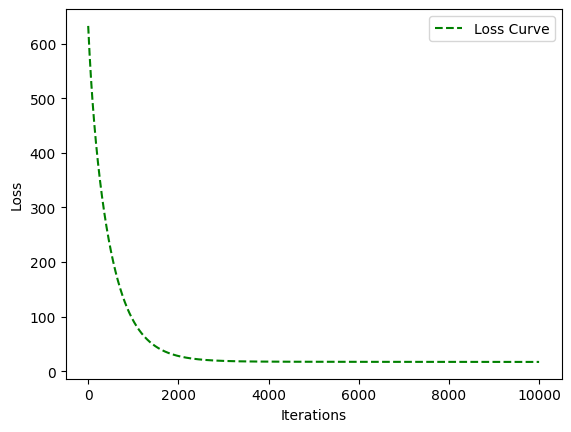

In [356]:
import matplotlib.pyplot as plt
plt.plot(loss_history,'g--',label='Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()
         

In [357]:

df = pd.DataFrame({
    'Iteration': range(1, iterations + 1),
    'Loss': loss_history,
    'Weight': [w[0] for w in weight_history],
    'Bias': bias_history,
    'R2 Score': r2_history
})


print(df) 



      Iteration        Loss    Weight       Bias  R2 Score
0             1  632.375945 -0.332786   0.022848 -6.478672
1             2  630.542627 -0.337623   0.045673 -6.456920
2             3  628.720531 -0.342426   0.068476 -6.435301
3             4  626.909539 -0.347198   0.091255 -6.413815
4             5  625.109534 -0.351938   0.114012 -6.392460
...         ...         ...       ...        ...       ...
9995       9996   17.250220 -0.801458  22.846986  0.796587
9996       9997   17.250195 -0.801474  22.846987  0.796587
9997       9998   17.250170 -0.801489  22.846988  0.796587
9998       9999   17.250146 -0.801505  22.846989  0.796588
9999      10000   17.250121 -0.801521  22.846990  0.796588

[10000 rows x 5 columns]


In [358]:
loss_history, weight_history, bias_history, r2_history = linear_regression(X_test, y_test, W, b, alpha, iterations)

训练最终损失: 28.61219359508553
训练最终 R²: 0.6542486903742192


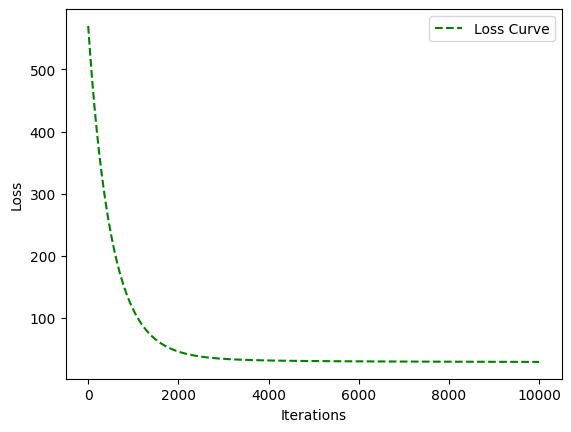

In [359]:
import matplotlib.pyplot as plt
plt.plot(loss_history,'g--',label='Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()
         

In [360]:
df = pd.DataFrame({
    'Iteration': range(1, iterations + 1),
    'Loss': loss_history,
    'Weight': [w[0] for w in weight_history],
    'Bias': bias_history,
    'R2 Score': r2_history
})


print(df) 

      Iteration        Loss    Weight       Bias  R2 Score
0             1  570.225154 -0.330785   0.021476 -5.903952
1             2  569.123069 -0.333632   0.042933 -5.890599
2             3  568.023923 -0.336460   0.064371 -5.877281
3             4  566.927699 -0.339267   0.085791 -5.863999
4             5  565.834383 -0.342055   0.107192 -5.850752
...         ...         ...       ...        ...       ...
9995       9996   28.612742 -0.627983  23.204826  0.654242
9996       9997   28.612605 -0.627994  23.204848  0.654244
9997       9998   28.612468 -0.628005  23.204870  0.654245
9998       9999   28.612331 -0.628016  23.204892  0.654247
9999      10000   28.612194 -0.628026  23.204914  0.654249

[10000 rows x 5 columns]
